In [ ]:
!nvidia-smi

Wed Apr  2 09:59:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [ ]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 5.35M/5.35M [00:00<00:00, 96.1MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 7.73MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 46.7ms
Speed: 13.7ms preprocess, 46.7ms inference, 424.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Download COCO val
import torch
#torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
#!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

In [ ]:
# Download COCO val
import torch
#torch.hub.download_url_to_file('tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

unzip:  cannot find or open tmp.zip, tmp.zip.zip or tmp.zip.ZIP.


In [ ]:
# Validate YOLO11n on COCO8 val
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 15.1MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 977.71file/s]
Dataset download success ✅ (0.9s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 26.9MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 45.86it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.34s/it]
                   all          4         17       0.57       0.85      0.847      0.632
                person          3         10      0.557        0.6      0.585      0.272
   

In [ ]:
# Train YOLO11n on COCO8 for 3 epochs
#!yolo train model=yolo11n.pt data=coco8.yaml epochs=3 imgsz=640

In [ ]:
!yolo checks


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                41.2/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                

In [ ]:
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()


  # to display images

In [ ]:
!pip install roboflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install roboflow
#nooo
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("name of workspace").project("project name")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to recipe-project-1 in yolov8:: 100%|██████████| 4508/4508 [00:01<00:00, 3300.16it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("workspace name").project("name of your project")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to recipe-project-2 in yolov8:: 100%|██████████| 7512/7512 [00:01<00:00, 5615.21it/s]


In [ ]:
!pip install --upgrade roboflow


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/recipe-project-2/data.yaml epochs=1 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 216MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/recipe-project-2/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [ ]:
!yolo val model=/content/runs/detect/train/weights/best.pt data=/content/recipe-project-2/data.yaml save_json=True


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,854,235 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/recipe-project-2/valid/labels.cache... 750 images, 1 backgrounds, 0 corrupt: 100% 750/750 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 47/47 [00:23<00:00,  2.03it/s]
                   all        750       2621      0.517      0.498      0.505        0.4
                 apple         30        125      0.335       0.36      0.333       0.27
                banana         30         67      0.475      0.776      0.682      0.511
                  bean         30         77      0.622      0.714      0.669      0.599
          black pepper         30         47      0.691      0.511      0.543      0.463
              capsicum         30         89      0.501      0.393      0.475      0.402
                carrot         30        149 

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:01<00:00, 98.1MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:20<00:00, 6100.77file/s]

Dataset download success ✅ (896.3s), saved to /content/datasets



val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:14<00:00, 351.74it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:47<00:00,  2.93it/s]


                   all       5000      36335      0.716       0.61      0.668      0.503
                person       2693      10777      0.821      0.746      0.829      0.618
               bicycle        149        314      0.741      0.525      0.627      0.403
                   car        535       1918      0.766      0.638      0.714        0.5
            motorcycle        159        367      0.806      0.678      0.792      0.549
              airplane         97        143       0.84      0.884      0.925      0.781
                   bus        189        283       0.85      0.784      0.864      0.751
                 train        157        190       0.88      0.889      0.938      0.769
                 truck        250        414      0.656       0.51      0.605      0.444
                  boat        121        424      0.729      0.469      0.574      0.335
         traffic light        191        634      0.723      0.483      0.568      0.322
          fire hydran

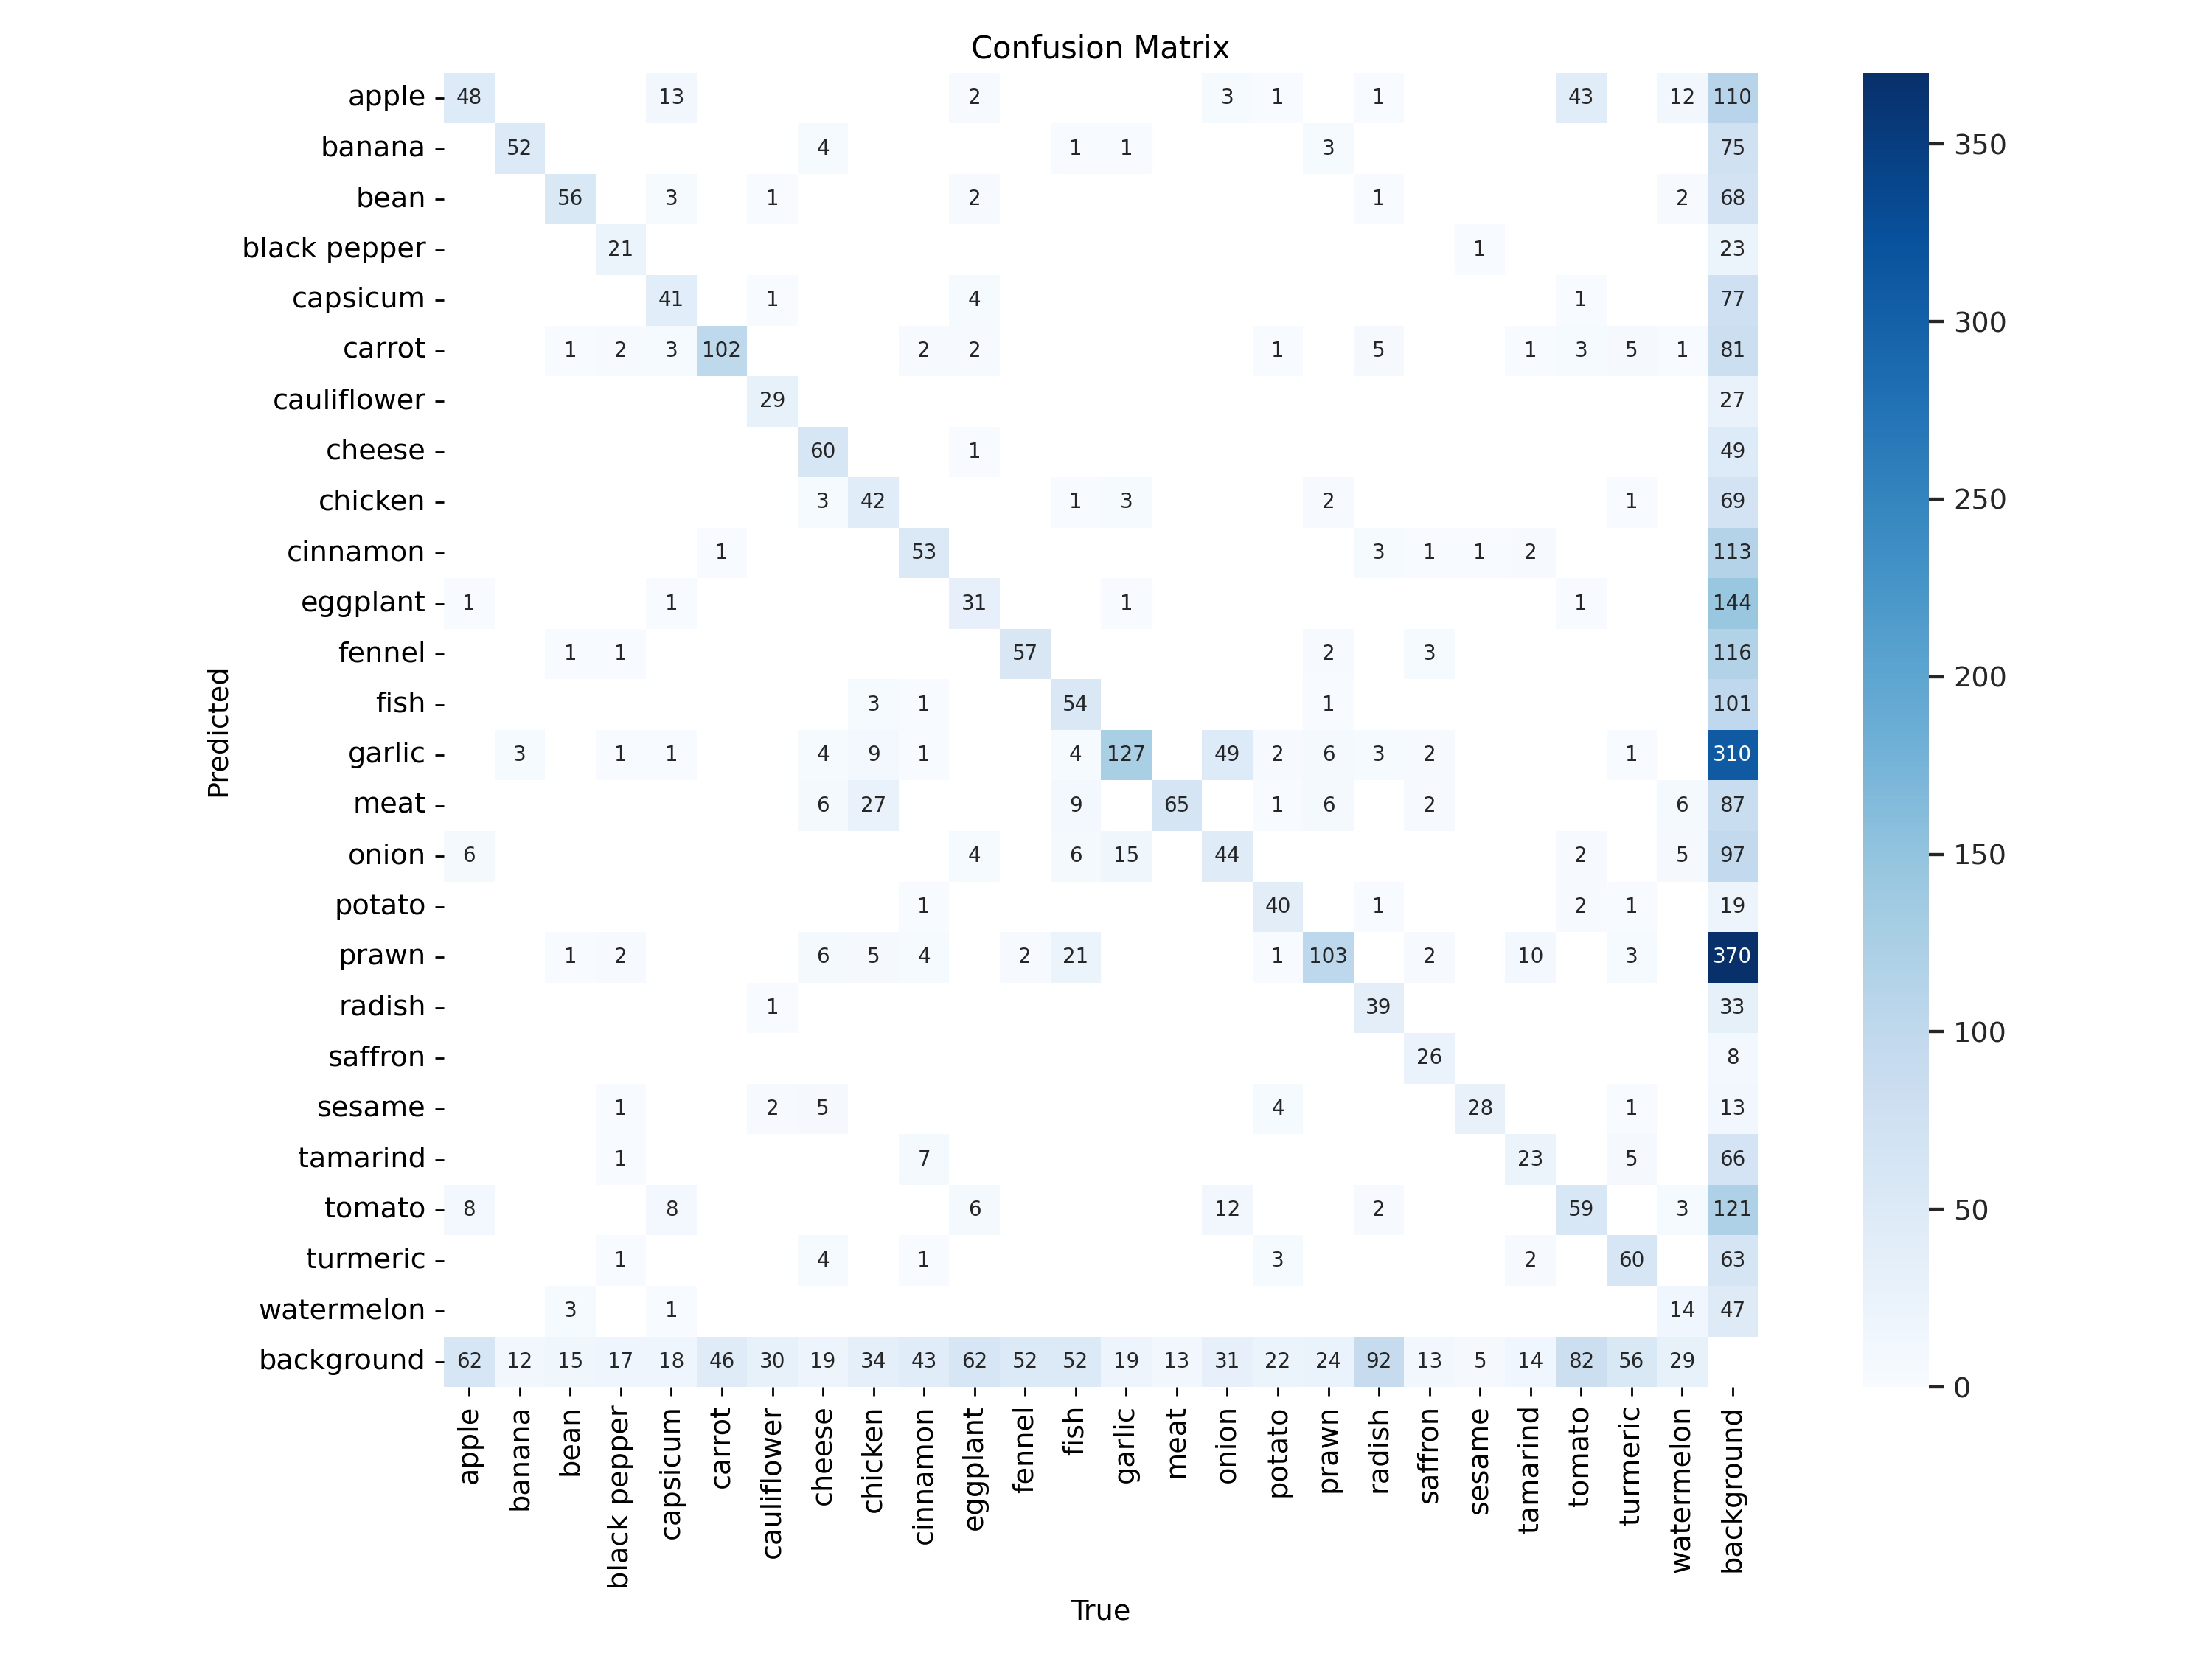

In [ ]:
from ultralytics import YOLO

# Load trained model (change path if necessary)
model = YOLO('/content/yolov8m.pt')

# Run validation and generate confusion matrix
metrics = model.val()

# Display the confusion matrix image
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/train/confusion_matrix.png'))


In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/train/confusion_matrix.png'))


In [ ]:

!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/chicken.jpeg' save=True

In [ ]:

!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/videoplayback (online-video-cutter.com).mp4' save=True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

video_path = "runs/detect/predict2/video.mp4"
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv2_imshow(frame)  # Use this instead of cv2.imshow()

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the saved YOLO output image
image_path = "/content/runs/detect/predict2/chicken.jpg"
img = cv2.imread(image_path)

# Convert BGR (OpenCV default) to RGB (for Matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow
#from ultralytics import YOLO

# Load YOLO model
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# Load video
video_path = "/content/Untitled design (1).mp4"
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO object detection
    results = model(frame)

    # Draw detections on frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = box.conf[0].item()  # Confidence score
            label = r.names[int(box.cls[0])]  # Class name

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with detections
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()


In [ ]:
# Only if your eviornment supports

!yolo predict model=/content/runs/detect/train/weights/best.pt source=0 show=True
